In [3]:
import os
import sys
import pickle
import re

import numpy as np
import scipy
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib

sys.path.append("/home/axel/mercury_orbit")
sys.path.append("/home/axel/mercury_orbit/integrators_objects/")
from integrators.euler_forward import EulerForward
from integrators.back_euler import BackEuler
from integrators.rk4 import Rk4Integrator

from utils.integrator_object_utils import save_integrators

from scipy.signal import find_peaks
from scipy.stats import linregress

In [6]:
t_start = 0
t_end = 3000

M = 1
r = 10
#v = 0.345

v = np.sqrt(M / r) #+ 0.01 * M / r
#v = 0.375#np.sqrt(M / r) + 0.001 * M / r
initial_conditions = np.array([r, 0.0, 0, v / r])

dt_array = [0.5, 0.3, 0.1, 0.08, 0.05, 0.01]

In [7]:
integrator_classes = {
    "euler": EulerForward,
    "back_euler": BackEuler, 
    "rk4": Rk4Integrator
}

integrators = {}

for name, integrator_class in integrator_classes.items():
    method_integrators = {}
    print(name)
    for dt in dt_array:#, 0.001]:
        print(dt)
        euler_forward_integrator = EulerForward(initial_conditions, dt, t_end, t_start, M)
        euler_forward_integrator.run_simulation()
        method_integrators[str(dt)] = euler_forward_integrator
        t_array = np.append(euler_forward_integrator.t_array, t_end)
        # ax.plot(t_array, euler_forward_integrator.get_system_energy(), "-", label="Euler forward")
    integrators[name] = method_integrators


euler
0.5
0.3
0.1
0.08
0.05
0.01
back_euler
0.5
0.3
0.1
0.08
0.05
0.01
rk4
0.5
0.3
0.1
0.08
0.05
0.01


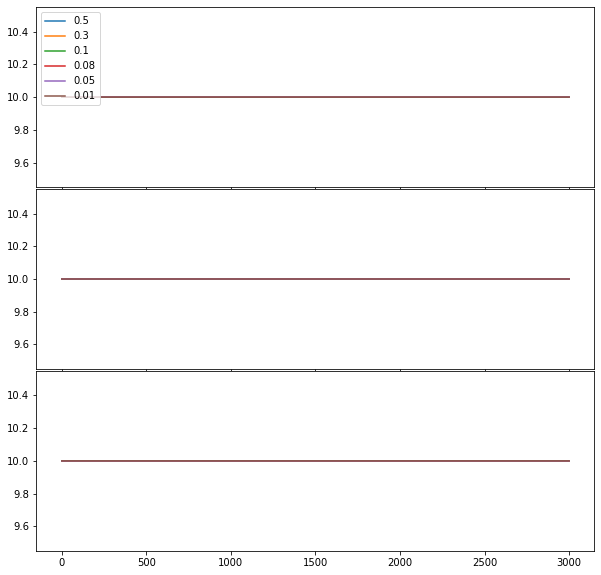

In [18]:
fig, axs = plt.subplots(3,1, figsize=(10,10), sharex=True)
fig.subplots_adjust(hspace=.01)
for i, integrator_solutions in enumerate(integrators.values()):
    #integrator_solutions = integrators["back_euler"]
    for dt, integrator in integrator_solutions.items():
        axs[i].plot(np.append(integrator.t_array, t_end), integrator.obs[:,0], label=dt)
axs[0].legend()


In [24]:
for name, integrator_solutions in integrators.items():
    r_means, r_var = [], []
    for dt, integrator in integrator_solutions.items():
        r_means.append(np.mean(integrator.obs[:,0]))
        r_var.append(np.var(integrator.obs[:,0]))
    print(r_means, r_var)
        

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
